In [1]:
import tensorflow as tf
from IPython.display import HTML

In [2]:
import numpy as np
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
image_size = 256
batch_size = 20
channels = 3

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
     shuffle=True,
     image_size=(image_size,image_size),
     batch_size=batch_size
)

Found 1951 files belonging to 4 classes.


In [11]:
class_name = dataset.class_names
class_name

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [12]:

len(dataset)

98

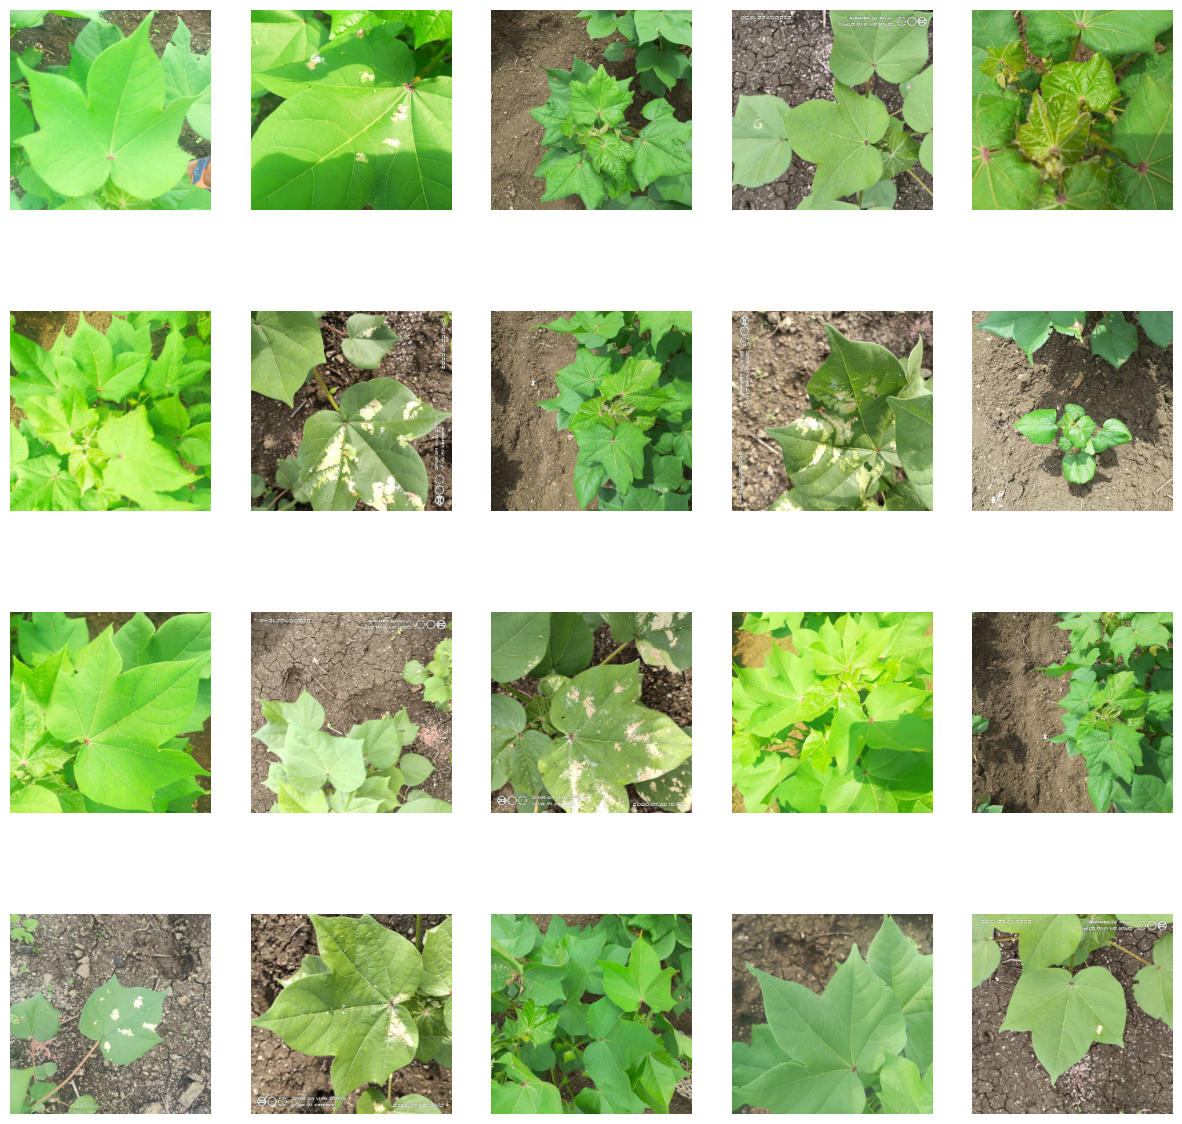

In [14]:
plt.figure(figsize = (15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(0,20):
        ax = plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        #plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [15]:
train_size =0.8
len(dataset)*train_size

78.4

In [16]:
train_data = dataset.take(78)


In [17]:
len(train_data)

78

In [18]:
test_data = dataset.skip(78)
len(test_data)

20

In [19]:
val_size = 0.1
len(dataset)*val_size

9.8

In [20]:
test_data = test_data.skip(9)
len(test_data)

11

In [21]:
def get_dataset_preparation_tf(ds,train_split = 0.8,val_split = 0.1,test_split =0.1,shuffle = True,shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)
    return train_ds,val_ds,test_ds
                              

In [22]:
train_ds,val_ds,test_ds = get_dataset_preparation_tf(dataset)

In [23]:
len(train_ds)

78

In [24]:
len(val_ds)

9

In [25]:
len(test_ds)

9

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Rescaling(image_size,image_size),
    layers.Rescaling(1.0/255)
])

In [28]:
resize_and_rescale

<Sequential name=sequential, built=False>

In [29]:
data_Augmentation = tf.keras.Sequential([
    layers.RandomFlip("Horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

In [30]:
train_ds = train_ds.map(
    lambda x, y: (data_Augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [81]:
input_shape = (batch_size,image_size,image_size,channels)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\jayesh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (20, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (20, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (20, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (20, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (20, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (20, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (20, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (20, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (20, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (20, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (20, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (20, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (20, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (20, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (20, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (20, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [119]:
history = model.fit(
    train_ds,
    epochs = 5,
    batch_size = batch_size,
    validation_data = val_ds,
    verbose = 1
)

Epoch 1/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 343ms/step - accuracy: 0.3978 - loss: 1.3263 - val_accuracy: 0.4000 - val_loss: 1.3145
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 344ms/step - accuracy: 0.4350 - loss: 1.2947 - val_accuracy: 0.3667 - val_loss: 1.3537
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 348ms/step - accuracy: 0.4382 - loss: 1.2930 - val_accuracy: 0.4833 - val_loss: 1.2657
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.4091 - loss: 1.3153 - val_accuracy: 0.4000 - val_loss: 1.3409
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 28s 343ms/step - accuracy: 0.4145 - loss: 1.3127 - val_accuracy: 0.3833 - val_loss: 1.3339


In [120]:
score = model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.3926 - loss: 1.3209


In [121]:
score

[1.3122758865356445, 0.4166666567325592]

In [122]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 78}

In [123]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [124]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

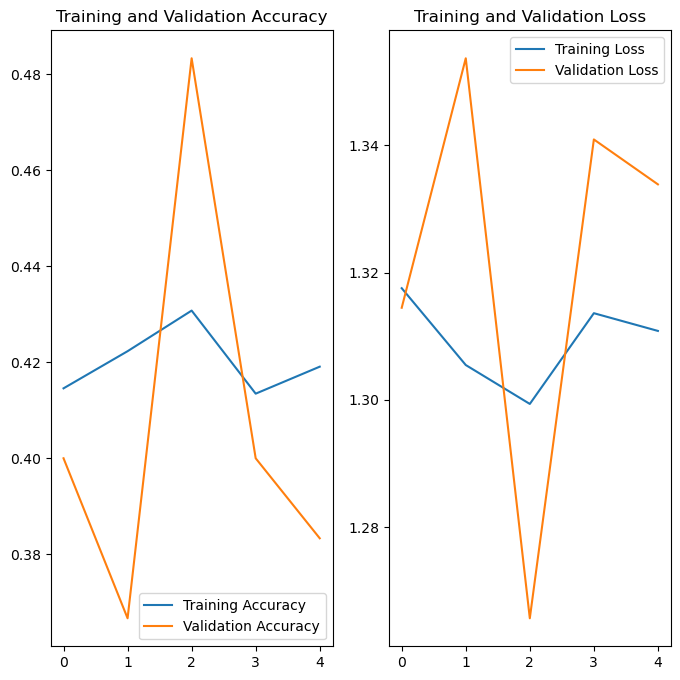

In [125]:
EPOCHS=5
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS) , acc , label='Training Accuracy')
plt.plot(range(EPOCHS) , val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS) , loss , label='Training Loss')
plt.plot(range(EPOCHS) , val_loss , label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
predicted labrl: diseased cotton plant


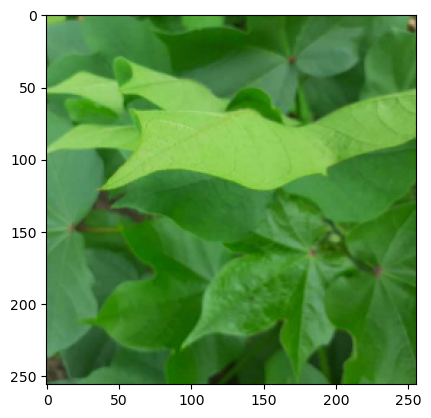

In [126]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    plt.imshow(first_image)
    batch_prediction = model.predict(image_batch)
    print("predicted labrl:",class_name[np.argmax(batch_prediction[5])])

In [127]:
 def predict(model,img):
        img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
        img_array  = tf.expand_dims(img_array,0)
        
        prediction= model.predict(img_array)
        
        predict_class = class_name[np.argmax(prediction[0])]
        confidence  = round(100*(np.max(prediction[0])),2)
        return predict_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


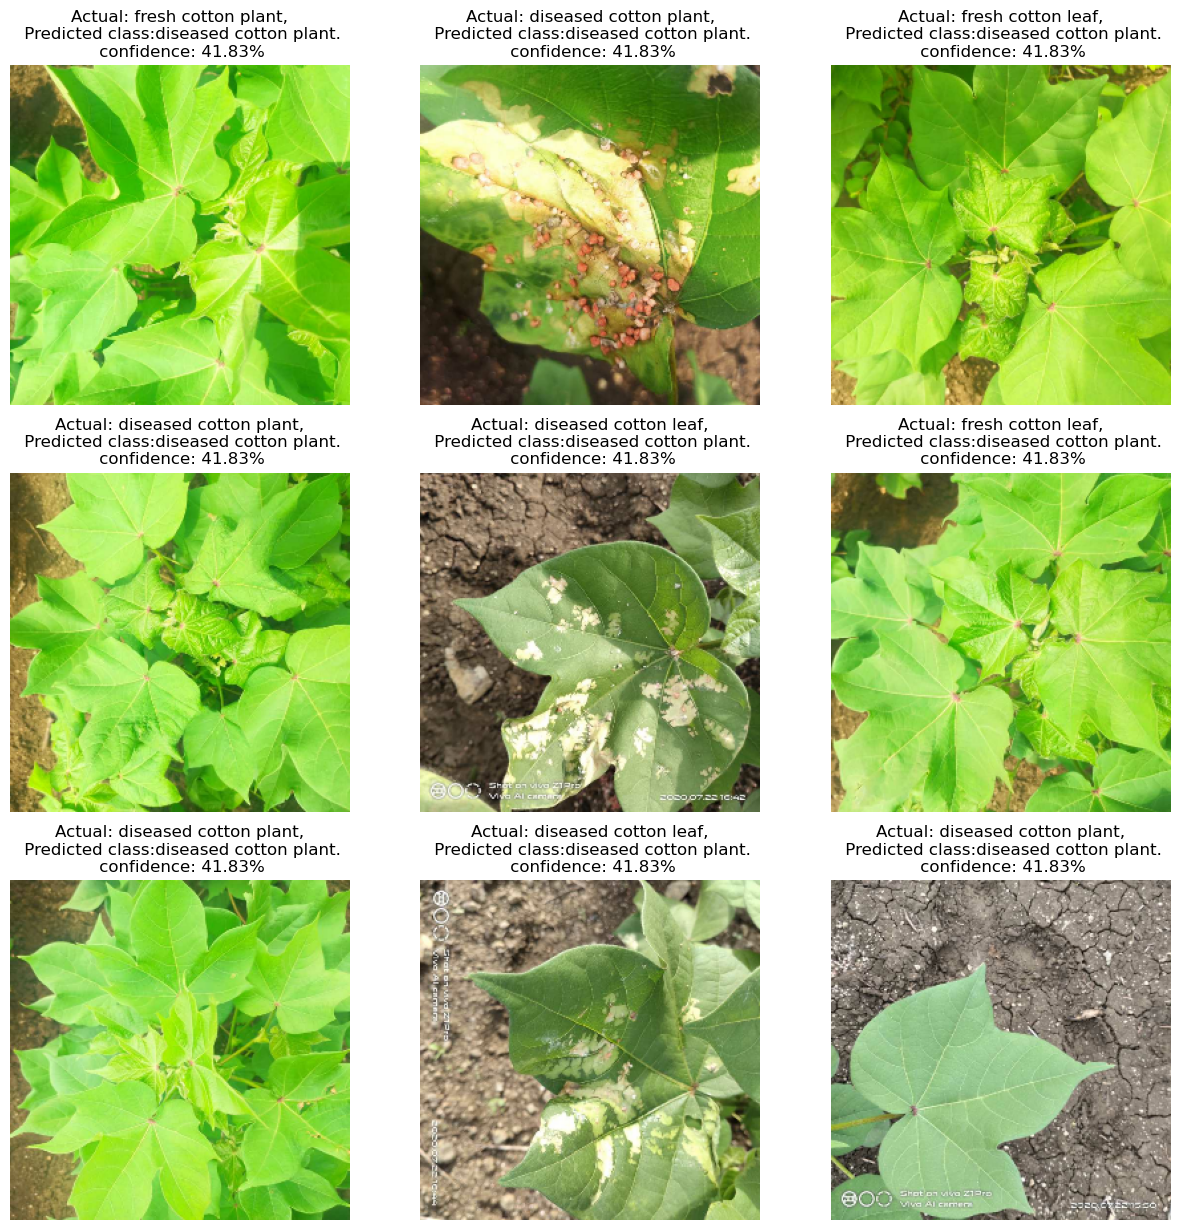

In [128]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted class:{predicted_class}.\n confidence: {confidence}%")
        
        plt.axis("off")    

In [34]:
import os
model_version = max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"models/{model_version}.h5")

ValueError: invalid literal for int() with base 10: '1.h5'

In [ ]:
model.save("../potatoes.h5")